In [12]:
import pandas as pd
#reading in data from excel
df = pd.read_excel("nlp_data_v3.xlsx")

In [3]:
import numpy as np
import pickle as pk
import warnings
warnings.filterwarnings("ignore")

In [4]:
from bs4 import BeautifulSoup
import unicodedata
import re

In [52]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import ne_chunk
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cdunn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cdunn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cdunn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\cdunn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\cdunn\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [13]:
df.head()

,Item_Number,Review,Rating
0,164BARBISTRO,I really like how the mahogany color added mor...,5
1,369MJCFSD,What a superb fryer! Your company is great to ...,5
2,35340520,I read about this knife at americastestkithen....,5
3,977670001 BX,The spoons have a nice weight and feel to them.,5
4,95381007,"Dripless, great candle!",5


In [15]:
df = df[['Rating','Review']]
df.head()

,Rating,Review
0,5,I really like how the mahogany color added mor...
1,5,What a superb fryer! Your company is great to ...
2,5,I read about this knife at americastestkithen....
3,5,The spoons have a nice weight and feel to them.
4,5,"Dripless, great candle!"


In [16]:
df['Review'].iloc[0]

'I really like how the mahogany color added more style to my kitchen island, more than a normal stool would have. Very durable, I really like them.'

In [17]:
df.dtypes

Rating     int64
Review    object
dtype: object

In [18]:
df['Review'] = df['Review'].astype(str)

In [19]:
def remove_html_tags_func(text):
    '''
    Removes HTML-Tags from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without HTML-Tags
    ''' 
    return BeautifulSoup(text, 'html.parser').get_text()

In [20]:
def remove_url_func(text):
    '''
    Removes URL addresses from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without URL addresses
    ''' 
    return re.sub(r'https?://\S+|www\.\S+', '', text)

In [21]:
def remove_accented_chars_func(text):
    '''
    Removes all accented characters from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without accented characters
    '''
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

In [22]:
def remove_punctuation_func(text):
    '''
    Removes all punctuation from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without punctuations
    '''
    return re.sub(r'[^a-zA-Z0-9]', ' ', text)

In [23]:
def remove_irr_char_func(text):
    '''
    Removes all irrelevant characters (numbers and punctuation) from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without irrelevant characters
    '''
    return re.sub(r'[^a-zA-Z]', ' ', text)

In [24]:
def remove_extra_whitespaces_func(text):
    '''
    Removes extra whitespaces from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without extra whitespaces
    ''' 
    return re.sub(r'^\s*|\s\s*', ' ', text).strip()

In [25]:
def word_count_func(text):
    '''
    Counts words within a string
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Number of words within a string, integer
    ''' 
    return len(text.split())

In [26]:
df['Clean_Reviews'] = df['Review'].str.lower()
df['Clean_Reviews'] = df['Clean_Reviews'].apply(remove_html_tags_func)
df['Clean_Reviews'] = df['Clean_Reviews'].apply(remove_url_func)
df['Clean_Reviews'] = df['Clean_Reviews'].apply(remove_accented_chars_func)
df['Clean_Reviews'] = df['Clean_Reviews'].apply(remove_punctuation_func)
df['Clean_Reviews'] = df['Clean_Reviews'].apply(remove_irr_char_func)
df['Clean_Reviews'] = df['Clean_Reviews'].apply(remove_extra_whitespaces_func)

df.head()

,Rating,Review,Clean_Reviews
0,5,I really like how the mahogany color added mor...,i really like how the mahogany color added mor...
1,5,What a superb fryer! Your company is great to ...,what a superb fryer your company is great to w...
2,5,I read about this knife at americastestkithen....,i read about this knife at americastestkithen ...
3,5,The spoons have a nice weight and feel to them.,the spoons have a nice weight and feel to them
4,5,"Dripless, great candle!",dripless great candle


In [28]:
df['Word_Count'] = df['Clean_Reviews'].apply(word_count_func)

In [29]:
df[['Clean_Reviews', 'Word_Count']].head()

,Clean_Reviews,Word_Count
0,i really like how the mahogany color added mor...,27
1,what a superb fryer your company is great to w...,27
2,i read about this knife at americastestkithen ...,62
3,the spoons have a nice weight and feel to them,10
4,dripless great candle,3


In [30]:
print('Average of words counted: ' + str(df['Word_Count'].mean()))

Average of words counted: 38.0592


In [31]:
pk.dump(clean_text, open('clean_text.pkl', 'wb'))

df.to_csv('reviewTest.csv', index = False)

NameError: name 'clean_text' is not defined

In [32]:
def remove_english_stopwords_func(text):
    '''
    Removes Stop Words (also capitalized) from a string, if present
    
    Args:
        text (str): String to which the function is to be applied, string
    
    Returns:
        Clean string without Stop Words
    ''' 
    # check in lowercase 
    t = [token for token in text if token.lower() not in stopwords.words("english")]
    text = ' '.join(t)    
    return text

In [33]:
pd.set_option('display.max_colwidth', 30)

In [34]:
df['Reviews_Tokenized'] = df['Clean_Reviews'].apply(word_tokenize)

df.head()

,Rating,Review,Clean_Reviews,Word_Count,Reviews_Tokenized
0,5,I really like how the maho...,i really like how the maho...,27,"[i, really, like, how, the..."
1,5,What a superb fryer! Your ...,what a superb fryer your c...,27,"[what, a, superb, fryer, y..."
2,5,I read about this knife at...,i read about this knife at...,62,"[i, read, about, this, kni..."
3,5,The spoons have a nice wei...,the spoons have a nice wei...,10,"[the, spoons, have, a, nic..."
4,5,"Dripless, great candle!",dripless great candle,3,"[dripless, great, candle]"


In [35]:
df['Token_Count'] = df['Reviews_Tokenized'].str.len()

df.head()

,Rating,Review,Clean_Reviews,Word_Count,Reviews_Tokenized,Token_Count
0,5,I really like how the maho...,i really like how the maho...,27,"[i, really, like, how, the...",27
1,5,What a superb fryer! Your ...,what a superb fryer your c...,27,"[what, a, superb, fryer, y...",27
2,5,I read about this knife at...,i read about this knife at...,62,"[i, read, about, this, kni...",62
3,5,The spoons have a nice wei...,the spoons have a nice wei...,10,"[the, spoons, have, a, nic...",10
4,5,"Dripless, great candle!",dripless great candle,3,"[dripless, great, candle]",3


In [36]:
print('Average of words counted: ' + str(df['Word_Count'].mean()))
print('Average of tokens counted: ' + str(df['Token_Count'].mean()))

Average of words counted: 38.0592
Average of tokens counted: 38.0684


In [37]:
df_subset = df[['Clean_Reviews', 'Word_Count', 'Reviews_Tokenized', 'Token_Count']]
df_subset['Diff'] = df_subset['Token_Count'] - df_subset['Word_Count']


df_subset = df_subset[(df_subset["Diff"] != 0)]
df_subset.sort_values(by='Diff', ascending=False)

,Clean_Reviews,Word_Count,Reviews_Tokenized,Token_Count,Diff
90,i am pleased to have saved...,26,"[i, am, pleased, to, have,...",27,1
1656,these are a little difficu...,29,"[these, are, a, little, di...",30,1
2220,the photo of the dispenser...,58,"[the, photo, of, the, disp...",59,1
2205,i was very disappointed in...,434,"[i, was, very, disappointe...",435,1
2179,the suction on this produc...,28,"[the, suction, on, this, p...",29,1
2168,i cannot believe that anyo...,50,"[i, can, not, believe, tha...",51,1
2067,i thought the bottle would...,25,"[i, thought, the, bottle, ...",26,1
2007,it broke within weeks manu...,23,"[it, broke, within, weeks,...",24,1
1896,the picture displayed for ...,111,"[the, picture, displayed, ...",112,1
1737,i cannot give this soap di...,50,"[i, can, not, give, this, ...",51,1


In [40]:
df_subset['Clean_Reviews'].iloc[2]

'these spoons are wonderful they look like the real thing and i cannot wait to use them for my wedding reception they are beautiful spoons'

In [41]:
df_subset['Reviews_Tokenized'].iloc[2]

['these',
 'spoons',
 'are',
 'wonderful',
 'they',
 'look',
 'like',
 'the',
 'real',
 'thing',
 'and',
 'i',
 'can',
 'not',
 'wait',
 'to',
 'use',
 'them',
 'for',
 'my',
 'wedding',
 'reception',
 'they',
 'are',
 'beautiful',
 'spoons']

In [42]:
df['Reviews_wo_Stop_Words'] = df['Reviews_Tokenized'].apply(remove_english_stopwords_func)

df.head()

,Rating,Review,Clean_Reviews,Word_Count,Reviews_Tokenized,Token_Count,Reviews_wo_Stop_Words
0,5,I really like how the maho...,i really like how the maho...,27,"[i, really, like, how, the...",27,really like mahogany color...
1,5,What a superb fryer! Your ...,what a superb fryer your c...,27,"[what, a, superb, fryer, y...",27,superb fryer company great...
2,5,I read about this knife at...,i read about this knife at...,62,"[i, read, about, this, kni...",62,read knife americastestkit...
3,5,The spoons have a nice wei...,the spoons have a nice wei...,10,"[the, spoons, have, a, nic...",10,spoons nice weight feel
4,5,"Dripless, great candle!",dripless great candle,3,"[dripless, great, candle]",3,dripless great candle


In [43]:
df['Word_Count_wo_Stop_Words'] = df['Reviews_wo_Stop_Words'].apply(word_count_func)

df.head().T

,0,1,2,3,4
Rating,5,5,5,5,5
Review,I really like how the maho...,What a superb fryer! Your ...,I read about this knife at...,The spoons have a nice wei...,"Dripless, great candle!"
Clean_Reviews,i really like how the maho...,what a superb fryer your c...,i read about this knife at...,the spoons have a nice wei...,dripless great candle
Word_Count,27,27,62,10,3
Reviews_Tokenized,"[i, really, like, how, the...","[what, a, superb, fryer, y...","[i, read, about, this, kni...","[the, spoons, have, a, nic...","[dripless, great, candle]"
Token_Count,27,27,62,10,3
Reviews_wo_Stop_Words,really like mahogany color...,superb fryer company great...,read knife americastestkit...,spoons nice weight feel,dripless great candle
Word_Count_wo_Stop_Words,14,12,42,4,3


In [72]:
##part3


In [73]:
def norm_stemming_func(text):
    '''
    Stemming tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use PorterStemmer() to stem the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with stemmed words
    '''  
    words = word_tokenize(text)
    text = ' '.join([PorterStemmer().stem(word) for word in words])
    return text

In [74]:
def norm_lemm_func(text):
    '''
    Lemmatize tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() to lemmatize the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''  
    words = word_tokenize(text)
    text = ' '.join([WordNetLemmatizer().lemmatize(word) for word in words])
    return text

In [75]:
def norm_lemm_v_func(text):
    '''
    Lemmatize tokens from string 
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() to lemmatize the created tokens
            POS tag is set to 'v' for verb
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''  
    words = word_tokenize(text)
    text = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words])
    return text

In [76]:
def norm_lemm_a_func(text):
    '''
    Lemmatize tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() to lemmatize the created tokens
            POS tag is set to 'a' for adjective
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    ''' 
    words = word_tokenize(text)
    text = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words])
    return text


In [77]:
def get_wordnet_pos_func(word):
    '''
    Maps the respective POS tag of a word to the format accepted by the lemmatizer of wordnet
    
    Args:
        word (str): Word to which the function is to be applied, string
    
    Returns:
        POS tag, readable for the lemmatizer of wordnet
    '''     
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [78]:
def norm_lemm_POS_tag_func(text):
    '''
    Lemmatize tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() to lemmatize the created tokens
            POS tag is determined with the help of function get_wordnet_pos()
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    ''' 
    words = word_tokenize(text)
    text = ' '.join([WordNetLemmatizer().lemmatize(word, get_wordnet_pos_func(word)) for word in words])
    return text

In [79]:
def norm_lemm_v_a_func(text):
    '''
    Lemmatize tokens from string
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Use WordNetLemmatizer() with POS tag 'v' to lemmatize the created tokens
    Step 3: Use word_tokenize() to get tokens from generated string        
    Step 4: Use WordNetLemmatizer() with POS tag 'a' to lemmatize the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with lemmatized words
    '''
    words1 = word_tokenize(text)
    text1 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='v') for word in words1])
    words2 = word_tokenize(text1)
    text2 = ' '.join([WordNetLemmatizer().lemmatize(word, pos='a') for word in words2])
    return text2

In [80]:
df['Reviews_lemmatized'] = df['Reviews_wo_Stop_Words'].apply(norm_lemm_v_a_func)

df['Word_Count_lemmatized_Reviews'] = df['Reviews_lemmatized'].apply(word_count_func)

df.head(3).T

,0,1,2
Rating,5,5,5
Review,I really like how the maho...,What a superb fryer! Your ...,I read about this knife at...
Clean_Reviews,i really like how the maho...,what a superb fryer your c...,i read about this knife at...
Word_Count,27,27,62
Reviews_Tokenized,"[i, really, like, how, the...","[what, a, superb, fryer, y...","[i, read, about, this, kni..."
Token_Count,27,27,62
Reviews_wo_Stop_Words,really like mahogany color...,superb fryer company great...,read knife americastestkit...
Word_Count_wo_Stop_Words,14,12,42
Reviews_lemmatized,really like mahogany color...,superb fryer company great...,read knife americastestkit...
Word_Count_lemmatized_Reviews,14,12,42


In [81]:
def remove_single_char_func(text, threshold=1):
    '''
    Removes single characters from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes words whose length falls below the threshold (by default = 1)
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        String with removed words whose length was below the threshold (by default = 1)
    ''' 
    threshold = threshold
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if len(word) > threshold])
    return text

Text(0, 0.5, 'Label')

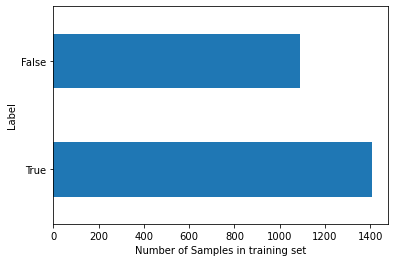

In [82]:
df['Reviews_cleaned_wo_single_char'] = df['Reviews_lemmatized'].apply(remove_single_char_func)

df['Word_Count_cleaned_Reviews_wo_single_char'] = df['Reviews_cleaned_wo_single_char'].apply(word_count_func)

df.head(3).T

,0,1,2
Rating,5,5,5
Review,I really like how the maho...,What a superb fryer! Your ...,I read about this knife at...
Clean_Reviews,i really like how the maho...,what a superb fryer your c...,i read about this knife at...
Word_Count,27,27,62
Reviews_Tokenized,"[i, really, like, how, the...","[what, a, superb, fryer, y...","[i, read, about, this, kni..."
Token_Count,27,27,62
Reviews_wo_Stop_Words,really like mahogany color...,superb fryer company great...,read knife americastestkit...
Word_Count_wo_Stop_Words,14,12,42
Reviews_lemmatized,really like mahogany color...,superb fryer company great...,read knife americastestkit...
Word_Count_lemmatized_Reviews,14,12,42


In [83]:
print('Average of lemmatized words counted: ' + str(df['Word_Count_lemmatized_Reviews'].mean()))
print('Average of cleaned words wo single char counted: ' + str(df['Word_Count_cleaned_Reviews_wo_single_char'].mean()))

Average of lemmatized words counted: 18.2792
Average of cleaned words wo single char counted: 18.2544


In [84]:
df_subset = df[['Reviews_lemmatized', 'Word_Count_lemmatized_Reviews', 
                'Reviews_cleaned_wo_single_char', 'Word_Count_cleaned_Reviews_wo_single_char']]

df_subset['Diff'] = df_subset['Word_Count_lemmatized_Reviews'] - \
                    df_subset['Word_Count_cleaned_Reviews_wo_single_char']


df_subset = df_subset[(df_subset["Diff"] != 0)]
df_subset = df_subset.sort_values(by='Diff', ascending=False)
df_subset.head().T

,1637,507,1356,1289,1257
Reviews_lemmatized,buy blender happy price ma...,nice pan usable area x adv...,work great price great siz...,one time purchase b b gues...,bite problem quality great...
Word_Count_lemmatized_Reviews,87,22,14,14,38
Reviews_cleaned_wo_single_char,buy blender happy price ma...,nice pan usable area adver...,work great price great siz...,one time purchase guest re...,bite problem quality great...
Word_Count_cleaned_Reviews_wo_single_char,84,20,12,12,36
Diff,3,2,2,2,2


In [88]:
df["Reviews_cleaned_wo_char_length_2"] = df.apply(lambda x: remove_single_char_func(x["Reviews_lemmatized"], 
                                                            threshold=2), axis = 1)

df['Word_Count_cleaned_Reviews_wo_char_length_2'] = df['Reviews_cleaned_wo_char_length_2'].apply(word_count_func)

df.head(3).T

,0,1,2
Rating,5,5,5
Review,I really like how the maho...,What a superb fryer! Your ...,I read about this knife at...
Clean_Reviews,i really like how the maho...,what a superb fryer your c...,i read about this knife at...
Word_Count,27,27,62
Reviews_Tokenized,"[i, really, like, how, the...","[what, a, superb, fryer, y...","[i, read, about, this, kni..."
Token_Count,27,27,62
Reviews_wo_Stop_Words,really like mahogany color...,superb fryer company great...,read knife americastestkit...
Word_Count_wo_Stop_Words,14,12,42
Reviews_lemmatized,really like mahogany color...,superb fryer company great...,read knife americastestkit...
Word_Count_lemmatized_Reviews,14,12,42


In [89]:
print('Average of lemmatized words counted: ' + str(df['Word_Count_lemmatized_Reviews'].mean()))
print('Average of cleaned words wo single char counted: ' + str(df['Word_Count_cleaned_Reviews_wo_single_char'].mean()))
print('Average of cleaned words wo char length 2 counted: ' + str(df['Word_Count_cleaned_Reviews_wo_char_length_2'].mean()))

Average of lemmatized words counted: 18.2792
Average of cleaned words wo single char counted: 18.2544
Average of cleaned words wo char length 2 counted: 18.0604


In [90]:
df_subset = df[['Reviews_lemmatized', 'Word_Count_lemmatized_Reviews', 
                'Reviews_cleaned_wo_char_length_2', 'Word_Count_cleaned_Reviews_wo_char_length_2']]

df_subset['Diff'] = df_subset['Word_Count_lemmatized_Reviews'] - \
                    df_subset['Word_Count_cleaned_Reviews_wo_char_length_2']


df_subset = df_subset[(df_subset["Diff"] != 0)]
#df_subset = df_subset.sort_values(by='Diff', ascending=False)
df_subset.head().T

,7,35,44,47,63
Reviews_lemmatized,ever since become chef alw...,must non expensive ovens s...,hard time find qt steamer ...,product perfect lunch take...,stuff work great fryer has...
Word_Count_lemmatized_Reviews,26,13,17,62,15
Reviews_cleaned_wo_char_length_2,ever since become chef alw...,must non expensive ovens s...,hard time find steamer loc...,product perfect lunch take...,stuff work great fryer has...
Word_Count_cleaned_Reviews_wo_char_length_2,25,12,16,61,14
Diff,1,1,1,1,1


In [93]:
def token_and_unique_word_count_func(text):
    '''
    Outputs the number of words and unique words
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to count unique words
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Prints:
        Number of existing tokens and number of unique words
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    print('Number of tokens: ' + str(len(words))) 
    print('Number of unique words: ' + str(len(fdist)))

In [94]:
def most_common_word_func(text, n_words=25):
    '''
    Returns a DataFrame with the most commonly used words from a text with their frequencies
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        A DataFrame with the most commonly occurring words (by default = 25) with their frequencies
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    n_words = n_words
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False).head(n_words)
    
    return df_fdist

In [95]:
def least_common_word_func(text, n_words=25):
    '''
    Returns a DataFrame with the least commonly used words from a text with their frequencies
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        A DataFrame with the least commonly occurring words (by default = 25) with their frequencies
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    n_words = n_words
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False).tail(n_words)
    
    return df_fdist

In [97]:
text_corpus = df['Reviews_cleaned_wo_single_char'].str.cat(sep=' ')

text_corpus

'really like mahogany color add style kitchen island normal stool would durable really like superb fryer company great work order another baby shortly clean fryer snap read knife americastestkithen com rat chef knife highly recommend forschner victorinox fibrox chefs knife comment one tester sum premium quality knife bargain price knives cost four time much would hard press match performance blade curve sharp handle comfortable overall sturdy well balance spoon nice weight feel dripless great candle great candle church annual chocolate festival use last three years wonderful fill tray say truffles cup wrap plastic stack trays cup sturdy also predict advance many bite count cup parishioners make treat home use cup work festival love love love cup ever since become chef always wonder want us wear white soon could switch dark color jacket aprons show stain product fit bill perfectly give firm rat excellant product inexpensive biodegradable work save item save pan importantly dishwashers t

In [98]:
token_and_unique_word_count_func(text_corpus)


Number of tokens: 45636
Number of unique words: 4488


In [99]:
df_most_common_words_text_corpus = most_common_word_func(text_corpus)

df_most_common_words_text_corpus.head(10)

,Word,Frequency
71,use,1125
15,great,599
142,good,595
113,product,487
10,would,453
42,price,436
1,like,413
16,work,386
199,get,369
36,one,367


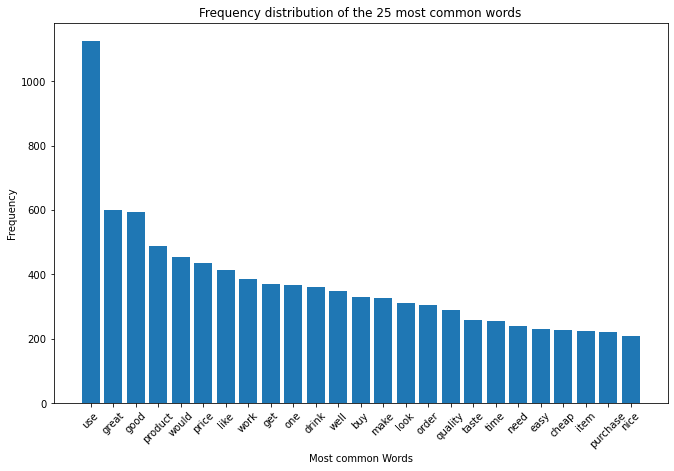

In [100]:
plt.figure(figsize=(11,7))
plt.bar(df_most_common_words_text_corpus['Word'], 
        df_most_common_words_text_corpus['Frequency'])

plt.xticks(rotation = 45)

plt.xlabel('Most common Words')
plt.ylabel("Frequency")
plt.title("Frequency distribution of the 25 most common words")

plt.show()

In [101]:
df_least_common_words_text_corpus = least_common_word_func(text_corpus, n_words=10)

df_least_common_words_text_corpus

,Word,Frequency
2605,chunky,1
2609,moe,1
2623,warrant,1
2610,tart,1
2615,casseroles,1
2617,regency,1
2618,utilitarian,1
2619,pag,1
2622,dose,1
4487,inexcusable,1


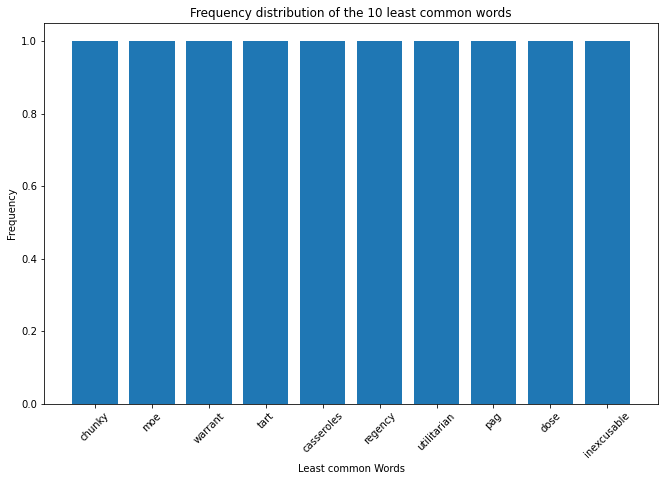

In [102]:
plt.figure(figsize=(11,7))
plt.bar(df_least_common_words_text_corpus['Word'], 
        df_least_common_words_text_corpus['Frequency'])

plt.xticks(rotation = 45)

plt.xlabel('Least common Words')
plt.ylabel("Frequency")
plt.title("Frequency distribution of the 10 least common words")

plt.show()

In [103]:
df['Rating'].value_counts()


5    500
4    500
3    500
2    500
1    500
Name: Rating, dtype: int64

In [104]:
def label_func(rating):
    if rating <= 2:
        return 'negative'
    if rating >= 4:
        return 'positive'
    else:
        return 'neutral'

df['Label'] = df['Rating'].apply(label_func)

In [105]:
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]

In [107]:
positive_review = df[(df["Label"] == 'positive')]['Reviews_cleaned_wo_single_char']
neutral_review = df[(df["Label"] == 'neutral')]['Reviews_cleaned_wo_single_char']
negative_review = df[(df["Label"] == 'negative')]['Reviews_cleaned_wo_single_char']

In [108]:
text_corpus_positive_review = positive_review.str.cat(sep=' ')
text_corpus_neutral_review = neutral_review.str.cat(sep=' ')
text_corpus_negative_review = negative_review.str.cat(sep=' ')

In [109]:
df_most_common_words_text_corpus_positive_review = most_common_word_func(text_corpus_positive_review)
df_most_common_words_text_corpus_neutral_review = most_common_word_func(text_corpus_neutral_review)
df_most_common_words_text_corpus_negative_review = most_common_word_func(text_corpus_negative_review)

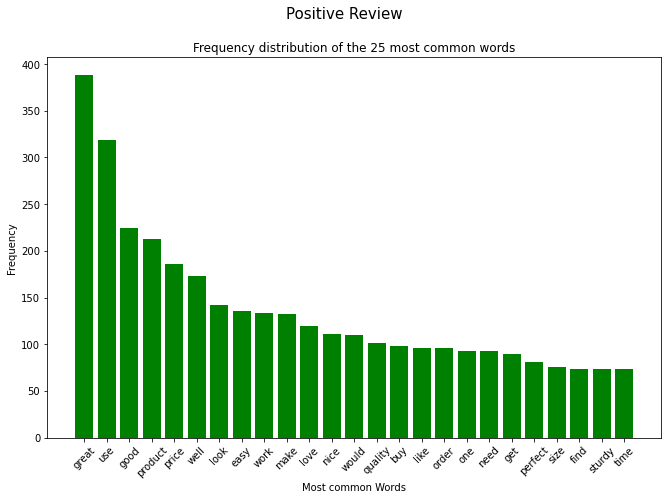

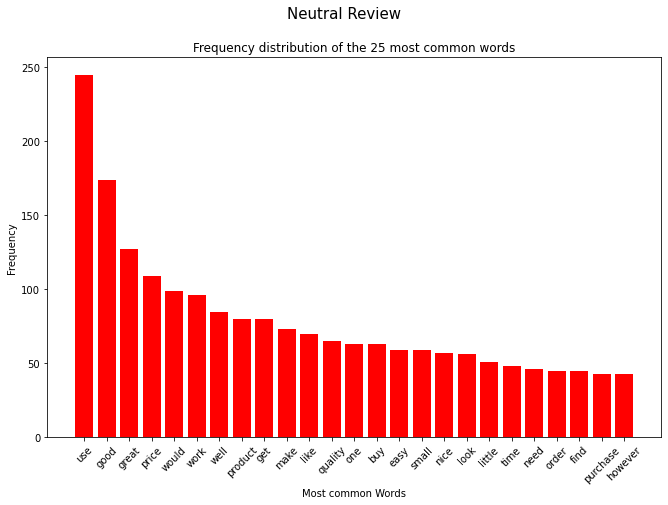

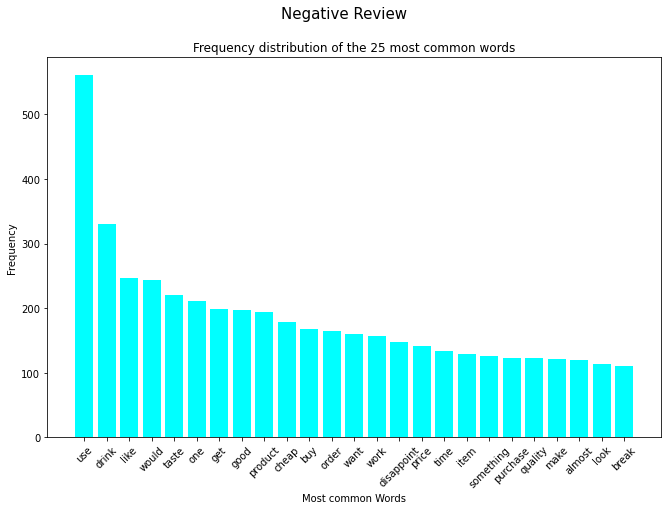

In [110]:
splited_data = [df_most_common_words_text_corpus_positive_review,
                df_most_common_words_text_corpus_neutral_review,
                df_most_common_words_text_corpus_negative_review]

color_list = ['green', 'red', 'cyan']
title_list = ['Positive Review', 'Neutral Review', 'Negative Review']


for item in range(3):
    plt.figure(figsize=(11,7))
    plt.bar(splited_data[item]['Word'], 
            splited_data[item]['Frequency'],
            color=color_list[item])
    plt.xticks(rotation = 45)
    plt.xlabel('Most common Words')
    plt.ylabel("Frequency")
    plt.title("Frequency distribution of the 25 most common words")
    plt.suptitle(title_list[item], fontsize=15)
    plt.show()

In [111]:
def single_word_remove_func(text, word_2_remove):
    '''
    Removes a specific word from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes the defined word from the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
        word_2_remove (str): Word to be removed from the text, string
    
    Returns:
        String with removed words
    '''    
    word_to_remove = word_2_remove
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word != word_to_remove])
    return text

In [112]:
def multiple_word_remove_func(text, words_2_remove_list):
    '''
    Removes certain words from string, if present
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Removes the defined words from the created tokens
    
    Args:
        text (str): String to which the functions are to be applied, string
        words_2_remove_list (list): Words to be removed from the text, list of strings
    
    Returns:
        String with removed words
    '''     
    words_to_remove_list = words_2_remove_list
    
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in words_to_remove_list])
    return text

In [113]:
def most_freq_word_func(text, n_words=5):
    '''
    Returns the most frequently used words from a text
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        List of the most frequently occurring words (by default = 5)
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)
    
    n_words = n_words
    most_freq_words_list = list(df_fdist['Word'][0:n_words])
    
    return most_freq_words_list

In [114]:
def most_rare_word_func(text, n_words=5):
    '''
    Returns the most rarely used words from a text
    
    Step 1: Use word_tokenize() to get tokens from string
    Step 2: Uses the FreqDist function to determine the word frequency
    
    Args:
        text (str): String to which the functions are to be applied, string
    
    Returns:
        List of the most rarely occurring words (by default = 5)
    ''' 
    words = word_tokenize(text)
    fdist = FreqDist(words) 
    
    df_fdist = pd.DataFrame({'Word': fdist.keys(),
                             'Frequency': fdist.values()})
    df_fdist = df_fdist.sort_values(by='Frequency', ascending=False)
    
    n_words = n_words
    most_rare_words_list = list(df_fdist['Word'][-n_words:])
    
    return most_rare_words_list

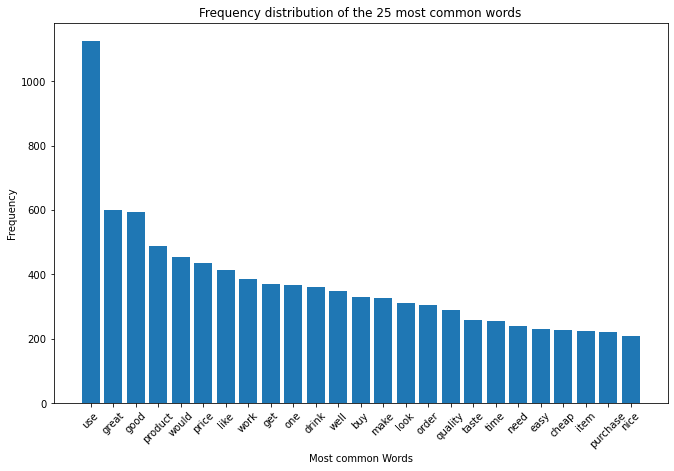

In [115]:
plt.figure(figsize=(11,7))
plt.bar(df_most_common_words_text_corpus['Word'], 
        df_most_common_words_text_corpus['Frequency'])

plt.xticks(rotation = 45)

plt.xlabel('Most common Words')
plt.ylabel("Frequency")
plt.title("Frequency distribution of the 25 most common words")

plt.show()

In [116]:
df_most_common_words_text_corpus.head()


,Word,Frequency
71,use,1125
15,great,599
142,good,595
113,product,487
10,would,453


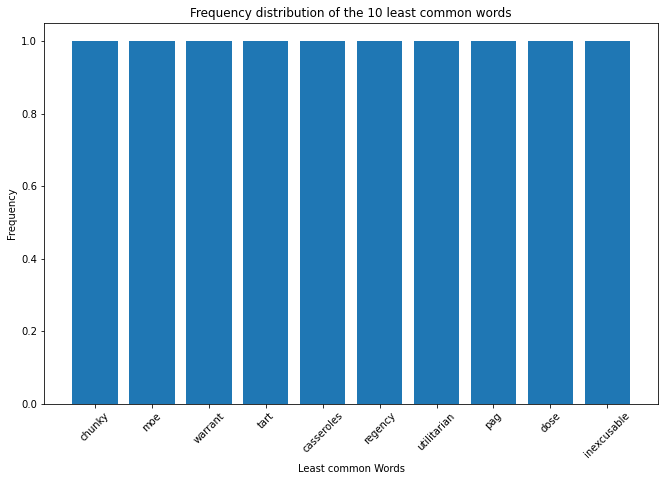

In [117]:
plt.figure(figsize=(11,7))
plt.bar(df_least_common_words_text_corpus['Word'], 
        df_least_common_words_text_corpus['Frequency'])

plt.xticks(rotation = 45)

plt.xlabel('Least common Words')
plt.ylabel("Frequency")
plt.title("Frequency distribution of the 10 least common words")

plt.show()

In [118]:
df_least_common_words_text_corpus.tail()


,Word,Frequency
2617,regency,1
2618,utilitarian,1
2619,pag,1
2622,dose,1
4487,inexcusable,1


In [119]:
df["Reviews_cleaned_wo_specific_word"] = df.apply(lambda x: single_word_remove_func(x["Reviews_cleaned_wo_single_char"], 
                                                            "use"), axis = 1)

In [120]:
text_corpus_original = df['Reviews_cleaned_wo_single_char'].str.cat(sep=' ')
text_corpus_wo_specific_word = df['Reviews_cleaned_wo_specific_word'].str.cat(sep=' ')

print('Number of words (bevore single word removal): ' + str(word_count_func(text_corpus_original)))
print('Number of words (after single word removal): ' + str(word_count_func(text_corpus_wo_specific_word)))
print()
print('Diff: ' + str(word_count_func(text_corpus_original) - word_count_func(text_corpus_wo_specific_word)))

Number of words (bevore single word removal): 45636
Number of words (after single word removal): 44511

Diff: 1125


In [171]:
df["Reviews_cleaned_wo_specific_word"] = df.apply(lambda x: multiple_word_remove_func(x["Reviews_cleaned_wo_specific_word"], 
                                                         ["product", "item"]), axis = 1)

In [172]:
text_corpus_wo_specific_words = df['Reviews_cleaned_wo_specific_words'].str.cat(sep=' ')

print('Number of words (bevore multiple word removal): ' + str(word_count_func(text_corpus_wo_specific_word)))
print('Number of words (after multiple word removal): ' + str(word_count_func(text_corpus_wo_specific_words)))
print()
print('Diff: ' + str(word_count_func(text_corpus_wo_specific_word) - word_count_func(text_corpus_wo_specific_words)))

Number of words (bevore multiple word removal): 44511
Number of words (after multiple word removal): 43799

Diff: 712


In [173]:
df.apply(lambda x: single_word_remove_func(x["Reviews_cleaned_wo_single_char"], 
                                                            "use"), axis = 1)

0       really like mahogany color...
1       superb fryer company great...
2       read knife americastestkit...
3              spoon nice weight feel
4               dripless great candle
                    ...              
2495    disappoint tablecloth look...
2496    order dozens november baby...
2497    order dozens november baby...
2498    order dozens november baby...
2499    disappoint tablecloth look...
Length: 2500, dtype: object

In [174]:
df.apply(lambda x: multiple_word_remove_func(x["Reviews_cleaned_wo_specific_word"], 
                                                         ["product", "item"]), axis = 1)

0       really like mahogany color...
1       superb fryer company great...
2       read knife americastestkit...
3              spoon nice weight feel
4               dripless great candle
                    ...              
2495    disappoint tablecloth look...
2496    order dozens november baby...
2497    order dozens november baby...
2498    order dozens november baby...
2499    disappoint tablecloth look...
Length: 2500, dtype: object

In [175]:
df.head()

,Label,Rating,Review,Clean_Reviews,Word_Count,Reviews_Tokenized,Token_Count,Reviews_wo_Stop_Words,Word_Count_wo_Stop_Words,Reviews_lemmatized,Word_Count_lemmatized_Reviews,Reviews_cleaned_wo_single_char,Word_Count_cleaned_Reviews_wo_single_char,Reviews_cleaned_wo_char_length_2,Word_Count_cleaned_Reviews_wo_char_length_2,Reviews_cleaned_wo_specific_word,Reviews_cleaned_wo_specific_words
0,positive,5,I really like how the maho...,i really like how the maho...,27,"[i, really, like, how, the...",27,really like mahogany color...,14,really like mahogany color...,14,really like mahogany color...,14,really like mahogany color...,14,really like mahogany color...,really like mahogany color...
1,positive,5,What a superb fryer! Your ...,what a superb fryer your c...,27,"[what, a, superb, fryer, y...",27,superb fryer company great...,12,superb fryer company great...,12,superb fryer company great...,12,superb fryer company great...,12,superb fryer company great...,superb fryer company great...
2,positive,5,I read about this knife at...,i read about this knife at...,62,"[i, read, about, this, kni...",62,read knife americastestkit...,42,read knife americastestkit...,42,read knife americastestkit...,42,read knife americastestkit...,42,read knife americastestkit...,read knife americastestkit...
3,positive,5,The spoons have a nice wei...,the spoons have a nice wei...,10,"[the, spoons, have, a, nic...",10,spoons nice weight feel,4,spoon nice weight feel,4,spoon nice weight feel,4,spoon nice weight feel,4,spoon nice weight feel,spoon nice weight feel
4,positive,5,"Dripless, great candle!",dripless great candle,3,"[dripless, great, candle]",3,dripless great candle,3,dripless great candle,3,dripless great candle,3,dripless great candle,3,dripless great candle,dripless great candle


In [190]:
finalData = pd.DataFrame(df[['Review','Reviews_cleaned_wo_specific_word', 'Label','Rating']])

In [191]:
finalData.head()

,Review,Reviews_cleaned_wo_specific_word,Label,Rating
0,I really like how the maho...,really like mahogany color...,positive,5
1,What a superb fryer! Your ...,superb fryer company great...,positive,5
2,I read about this knife at...,read knife americastestkit...,positive,5
3,The spoons have a nice wei...,spoon nice weight feel,positive,5
4,"Dripless, great candle!",dripless great candle,positive,5


In [181]:
finalData['Subjectivity'] = finalData['Reviews_cleaned_wo_specific_word'].apply(getSubjectivity) 
finalData['Polarity'] = finalData['Reviews_cleaned_wo_specific_word'].apply(getPolarity) 
finalData['Analysis'] = finalData['Polarity'].apply(analysis)

In [182]:
finalData.head(20)

,Reviews_cleaned_wo_specific_word,Label,Rating,Subjectivity,Polarity,Analysis
0,really like mahogany color...,positive,5,0.350000,0.183333,Positive
1,superb fryer company great...,positive,5,0.816667,0.722222,Positive
2,read knife americastestkit...,positive,5,0.471944,0.057222,Positive
3,spoon nice weight feel,positive,5,1.000000,0.600000,Positive
4,dripless great candle,positive,5,0.750000,0.800000,Positive
5,great candle,positive,5,0.750000,0.800000,Positive
6,church annual chocolate fe...,positive,5,0.561111,0.500000,Positive
7,ever since become chef alw...,positive,5,0.440000,0.210000,Positive
8,excellant inexpensive biod...,positive,5,0.550000,0.200000,Positive
9,great great price,positive,5,0.750000,0.800000,Positive


In [183]:
tb_counts = finalData.Analysis.value_counts()
tb_counts

Positive    1976
Negative     431
Neutral       93
Name: Analysis, dtype: int64

In [184]:
finalData.loc[finalData['Rating'] == 5, 'Comparison']='Positive'
finalData.loc[finalData['Rating'] == 4,'Comparison']='Positive'
finalData.loc[finalData['Rating'] == 3, 'Comparison']='Neutral'
finalData.loc[finalData['Rating'] == 2, 'Comparison']='Negative'
finalData.loc[finalData['Rating'] == 1, 'Comparison']='Negative'
finalData.loc[finalData['Rating'] == 0, 'Comparison']='Not Accurate'

In [185]:
finalData['Accuracy']=finalData['Analysis'] == finalData['Comparison']

Text(0, 0.5, 'Label')

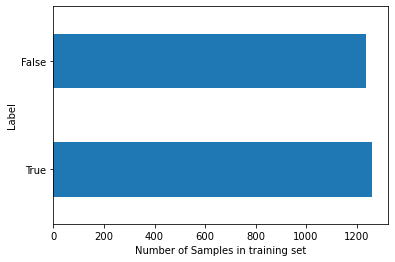

In [186]:
ax= finalData['Accuracy'].value_counts(sort=False).plot(kind='barh')
ax.set_xlabel("Number of Samples in training set")
ax.set_ylabel("Label")

In [187]:
tb_counts = finalData.Accuracy.value_counts()
tb_counts

True     1262
False    1238
Name: Accuracy, dtype: int64

In [176]:
text_corpus = df['Reviews_cleaned_wo_specific_word'].str.cat(sep=' ')
text_corpus

'really like mahogany color add style kitchen island normal stool would durable really like superb fryer company great work order another baby shortly clean fryer snap read knife americastestkithen com rat chef knife highly recommend forschner victorinox fibrox chefs knife comment one tester sum premium quality knife bargain price knives cost four time much would hard press match performance blade curve sharp handle comfortable overall sturdy well balance spoon nice weight feel dripless great candle great candle church annual chocolate festival last three years wonderful fill tray say truffles cup wrap plastic stack trays cup sturdy also predict advance many bite count cup parishioners make treat home cup work festival love love love cup ever since become chef always wonder want us wear white soon could switch dark color jacket aprons show stain fit bill perfectly give firm rat excellant inexpensive biodegradable work save save pan importantly dishwashers time solid rat great great pri

In [177]:
common = most_common_word_func(text_corpus)

common.head(10)

,Word,Frequency
15,great,599
139,good,595
10,would,453
42,price,436
1,like,413
16,work,386
196,get,369
36,one,367
710,drink,361
59,well,349


In [188]:
filter = finalData["Accuracy"]==False
filter

0       False
1       False
2       False
3       False
4       False
        ...  
2495     True
2496     True
2497     True
2498     True
2499     True
Name: Accuracy, Length: 2500, dtype: bool

In [189]:
filteredData = finalData.where(filter)
filteredData.to_csv('reviewsFalse.csv', index=False)